In [5]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
sns.set_style("ticks", {'axes.grid': False})

In [6]:
# Load data
src_data_file = '../data/data.csv'
data = pd.read_csv(src_data_file, na_values='\\N')

[ 0. 10. 20. 30. 40. 50. 60. 70. 80.]
[ 0.  5. 10. 20. 30. 40. 50. 60. 70. 80.]
(0.0, 5.0]      83.333333
(5.0, 10.0]     48.484848
(10.0, 20.0]    35.294118
(20.0, 30.0]    47.368421
(30.0, 40.0]    59.302326
(40.0, 50.0]    66.666667
(50.0, 60.0]    55.263158
(60.0, 70.0]    90.476190
(70.0, 80.0]    83.333333
Name: CFR, dtype: float64


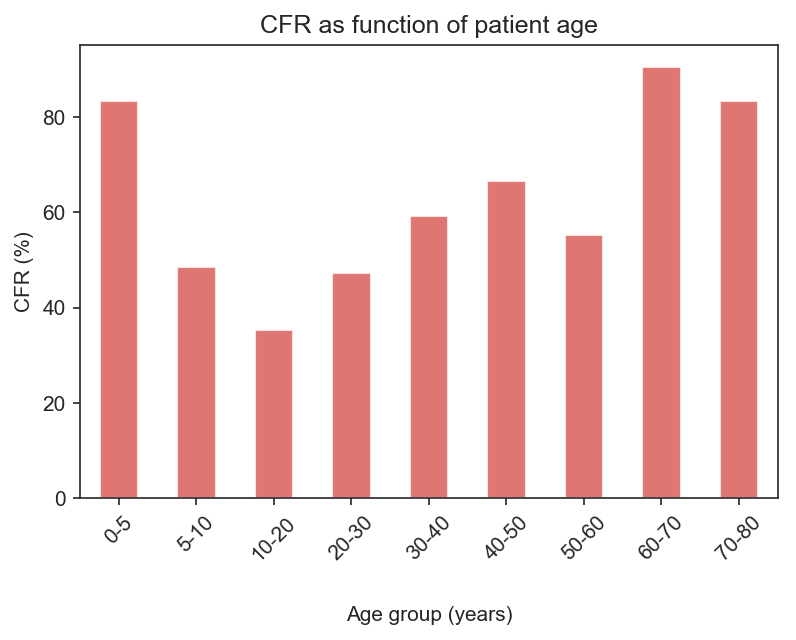

In [7]:
var = 'PatientAge'
mina = data[var].min()
maxa = data[var].max()

nbins = 8
diff = 10.0
bins = np.linspace(0, 80, nbins + 1)
print(bins)

bins = np.array([0.0, 5.0] + list(bins[1:]))
print(bins)

bin_names = []
for age in bins[0:2]:
    bin_names += [str(int(age)) + '-' + str(int(age + 5.0))]

for age in bins[2:]:
    bin_names += [str(int(age)) + '-' + str(int(age + 10.0))]
    
data1 = data.copy()
binned = pd.cut(data[var], bins)
data2 = pd.DataFrame()
data2['Disposition'] = data1['Disposition']
data2['Age group'] = binned
data2.dropna(inplace=True)

# Count number of total, diseased, and recovered patients
tot = pd.value_counts(data2['Age group'], sort=False)
died = pd.value_counts(data2[data2['Disposition'] == 1]['Age group'], sort=False)
rec = pd.value_counts(data2[data2['Disposition'] == 0]['Age group'], sort=False)

# CFR in %
cfr = 100 * died / tot
data3 = pd.DataFrame()
data3['CFR'] = cfr
data3['Count'] = tot

print(data3['CFR'])

# Combine plots
fig = plt.figure()
# ax1 = data3.CFR.plot(kind='bar', color=sns.xkcd_rgb["pale red"], legend=True, width=0.5, alpha=0.8)
ax1 = data3.CFR.plot(kind='bar', color=sns.xkcd_rgb["pale red"], width=0.5, alpha=0.8)
# ax2 = data3.Count.plot(kind='line', secondary_y=True, legend=True)
ax1.set_xlabel('Age group (years)', labelpad=20)
ax1.set_ylabel('CFR (%)')
# ax1.set_xticks( [ 0.5, 1.5, 2.5 ] )
ax1.set_xticklabels(bin_names, rotation=45)
# plt.xticks(bins, [], rotation=45)

# ax2.set_ylabel('Total count')
plt.title('CFR as function of patient age')

fig.savefig('cfr_age.pdf', bbox_inches='tight')